<a href="https://colab.research.google.com/github/anomishra/Logistic_Regression_Titanic_dataset/blob/master/Titanic_dataset_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!pip install tflearn
!pip install git+https://github.com/tflearn/tflearn.git
!pip install --upgrade tensorflow

  Cloning https://github.com/tflearn/tflearn.git to /tmp/pip-req-build-nb4_u_w5
  Running setup.py bdist_wheel for tflearn ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-bzgibit_/wheels/5a/18/2a/c62b9937b37223da935fb6b2965f02fbc45691e460a08b91b4
Successfully built tflearn
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (1.12.0)


In [0]:
import tflearn
import tensorflow as tf
import numpy as np

Data preprocess:

Deleting name column in the dataframe as it is not important.
Also, neural network use only numerical values (float) hence, replacing values of sex: female = 1, male = 0.

For columns use axis = 1 and for row use axis = 0

In [176]:


from tflearn.datasets import titanic
titanic.download_dataset('titanic_dataset.csv') #download the dataset

from tflearn.data_utils import load_csv
import pandas as pd
data = pd.read_csv('titanic_dataset.csv')
data = data.drop(['name','ticket'], axis = 1) 
#for columns use axis = 1 and for row use axis = 0

#Another form to load
#data, labels = load_csv('titanic_dataset.csv', target_column=0, categorical_labels=True, n_classes=2)
#data = pd.DataFrame(data = data, columns = ["label", "name", "sex", "age", "siblings", "parch", "ticket", "fare"])
#data

#row_count = data.shape[0]

#replacing values of sex: female = 1, male = 0 
data['sex'].replace('female', 1.,inplace=True)        
data['sex'].replace('male', 0.,inplace=True)
#data
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
survived    1309 non-null int64
pclass      1309 non-null int64
sex         1309 non-null float64
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
dtypes: float64(3), int64(4)
memory usage: 71.7 KB


,survived,pclass,sex,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.381971,2.294882,0.355997,23.877515,0.498854,0.385027,33.276075
std,0.486055,0.837836,0.478997,17.590848,1.041658,0.865560,51.743642
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,7.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


For checking any missing values in dataset, try these below:
1. data.shape or
2. data.isnull() or
3. data.isnull().values.any() or
4. data.isnull().sum() or
4. data.isnull().sum().sum() or

Plotting histogram:
You can also visualize the data (here column = 'age') by plotting histogram.
seaborn is used here.

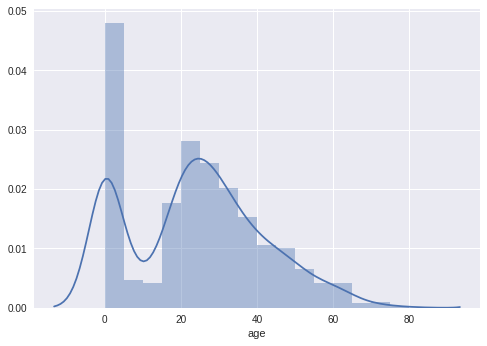

In [177]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(data['age'])

In [0]:
#precprocessing the data
X_data = data.drop('survived', axis = 1) 

#call the entire column
#data.loc[:,'Column_name']

Y_data = pd.get_dummies(data.loc[:,'survived'])
#Y_data

#changing the datasets into arrays
X_data = np.array(X_data)
Y_data = np.array(Y_data)
Y_data = Y_data.astype(float) 
#X_data
#Y_data
tf.reset_default_graph()

A one hot encoding allows the representation of categorical data to be more expressive.

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [0]:

#no need here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=42)
#X_train
#X_test
#y_train
#y_test

Now building a neural network using tflearn module.

*  We are having 6 features in data.
*  We will run it for 10 epochs (the network will see all data 10 times) with a batch size of 16.

Let's do the training.



In [160]:
net = tflearn.input_data(shape=[None, 6])
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net)

# Define model
model = tflearn.DNN(net)
# Start training (apply gradient descent algorithm)
model.fit(X_data, Y_data, n_epoch=10, batch_size=16, show_metric=True)


Training Step: 819  | total loss: 0.44933 | time: 0.330s
| Adam | epoch: 010 | loss: 0.44933 - acc: 0.8134 -- iter: 1296/1309
Training Step: 820  | total loss: 0.42872 | time: 0.333s
| Adam | epoch: 010 | loss: 0.42872 - acc: 0.8258 -- iter: 1309/1309
--


It was ran on TPU runtime, that's why faster training results.

In [0]:
#  some data for DiCaprio and Winslet
dicaprio = {'pclass':3,'name':'Jack Dawson', 'sex':0, 'age':19, 'siblings': 0, 'parch':0, 'ticket':'N/A', 'fare': 5.0000}
winslet = {'pclass':1,'name':'Rose DeWitt Bukater', 'sex':1, 'age':17, 'siblings': 1, 'parch':2, 'ticket':'N/A', 'fare': 100.0000}

#from above data set needed are in order
# [ pclass, sex, age,siblings, parch, fare ]
# Preprocess data
dicaprio = np.array([3,0,19,0,0,5.0000])
winslet = np.array([1,1,17,1,2,100.0000])
#dicaprio
#winslet


You can arrange or fetch from any datatype. Make sure that you are processing it into it's above designed form. I;m directly taking the data into numpy array form. 
Also, I provided a dictionary type for single data. One can automate it to process into numpy array. (*Hint, be sure that while processing the data is in ordered pair)

In [175]:
# Predict surviving chances (class 1 results)
pred = model.predict([dicaprio,winslet])
print("DiCaprio Surviving Rate:", pred[0][1])
print("Winslet Surviving Rate:", pred[1][1])

DiCaprio Surviving Rate: 0.110949695
Winslet Surviving Rate: 0.8660004


Dicapirio survival chance is 11% (also movie results the same).
Winslet chance is pretty high, i.e., 86%.